## Загрузка данных и изучение общей информации

* Перед нами данные интернет-магазина "Стримчик", который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. ДАнные доступны до 2016 года включительно. Нам необходимо проанализировать данные и выявить критерии, определяющие успешность игры на рынке.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv', sep=',')

pd.options.display.max_columns = None

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# воспользуемся методом info, посмотрим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посчитаем дубликаты
data.duplicated().sum()

0

In [6]:
# посмотрим, сколько пропусков в каждом столбце
data.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

* В датасете больше 16 тыс. строк. Дубликаты отсутствуют. Имеется много пропусков в столбцах с рейтингами пользователей и критиков

## Подготовка данных

### Замена названий столбцов

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* В столбцах имя и жанр имеются по два пропуска, удалим эти две строки, на анализ они не повлияют и данных в них мало

In [10]:
data = data.dropna(subset=['name'])

In [11]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data['year_of_release'].isna().sum() / data.shape[0]

0.016095255190570215

* В столбце с годом релиза 269 пропусков. Это около 1.6% от всех данных. Чтобы было проще работать дальше с этим столбцом, удалим строки с пропуском года, потому как заполнить их корректно не представляется возможным

In [13]:
data = data.dropna(subset=['year_of_release'])

In [14]:
data.isna().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6605
rating             6676
critic_score       8461
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
data.pivot_table(index='year_of_release', values=['critic_score', 'user_score', 'rating', 'name'], aggfunc='count')

,critic_score,name,rating,user_score
year_of_release,,,,
1980.0,0,9,0,0
1981.0,0,46,0,0
1982.0,0,36,0,0
1983.0,0,17,0,0
1984.0,0,14,0,0
1985.0,1,14,1,1
1986.0,0,21,0,0
1987.0,0,16,0,0
1988.0,1,15,1,1


* ОСтались пропуски в столбцах с рейтингами. Их очень много, больше половины от всех данных, удалять их точно нельзя. Также не вижу смысла заполнять их значениями средними или медианными, так как на оценку влияет очень много факторов, мне кажется, средними или медианой можно совсем не попасть в верные значения. Поэтому пока оставим как есть, ниже вернемся к столбцу с оценками пользователей.
* Так как пропуски есть в основном в столбцах с рейтингами, возможны следующие их причины: что-то конечно может быть пропущено случайно; но причина основной части пропусков - отсутствие рейтинга для игры. Возрастной рейтинг может отсутствовать, потому что игра вышла раньше создания организации, проставлявшей рейтинг. Игра может быть наоборот совсем новой, и рейтинг еще не успели присвоить. Если это рейтинги пользователей и критиков, то отсутствие рейтинга - возможное недостаточное количество отзывов. Видна очевидная зависимость по годам выпуска - чем новее, тем больше рейтингов появляется, индустрия игр стала развиваться и отзывов стало появляться больше и больше

In [17]:
# Код ревьюера
df = pd.melt(data, id_vars=['critic_score', 'user_score','rating'], value_vars=['na_sales', 'eu_sales', 'jp_sales'])
df[df['value'] > 0].groupby('variable').agg({'critic_score' : lambda x : x.isna().mean(), 'rating' : lambda x : x.isna().mean()})

,critic_score,rating
variable,,
eu_sales,0.370107,0.279921
jp_sales,0.661621,0.643880
na_sales,0.385911,0.249104


### Преобразование типов данных

In [18]:
# поменяем тип данных в столбцах с годом выпуска игры
data['year_of_release'] = data['year_of_release'].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


* В целом нас устраивают теперь все типы данных кроме столбца с пользовательскими рейтингами. Тип данных object, значит в столбце присутствуют строки и пустые значения. Попрбуем разобраться с ними.

In [20]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


* В столбце пользовательского рейтинга есть значение 'tbd' - to be determined, будет определено. Такое обозначение может ставиться, если отзывов для проставления рейтинга очень мало или игра вышла недавно и еще не успела оцениться. По сути для нас это значит, что сейчас пользовательский рейтинг отсутствует, как и в случае с пустыми значениями Nan. Удалять эти строки нельзя, так как пропуски в рейтинге занимают больше половины данных. Попробуем заменить 'tbd' и Nan заглушками, чтобы со столбцом можно было работать, а в дальнейшем при анализе именно рейтинга отсечем строки с заглушками. Так как у пользовательского рейтинга значения от 0 до 10, поставим заглушку 111.

In [21]:
# заменили данные на тип float, принудительно заменив некорректные значения на Nan
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [22]:
data['user_score'] = data['user_score'].fillna(111)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионах

In [24]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,111.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,111.0,NaN,31.38


## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

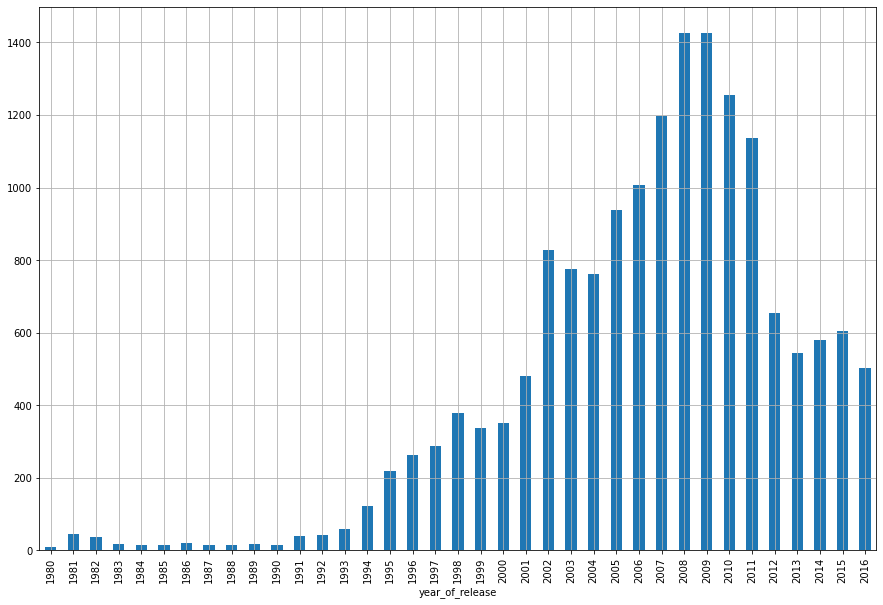

In [26]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(15,10), grid=True);

* До начала двухтысячных игр выпускалось очень мало, что вполне объяснимо - индустрия только развивалась, эра домашних ПК только-только начала зарождаться. В дальнейшем анализе можно не учитывать данные раньше как минимум 2000 года - и по причине малого количества игр, и также из-за того, что мода на игры тоже меняется, а нам интересно ближайшее время. Вероятно, в дальнейшем анализе получится отсечь и более новые года.
* Также заметно снижение после 2008-2009 годов - вероятно, это объяснимо развитием мобильных игр и переходом аудитории на другой рынок

### Анализ продаж по платформам

In [27]:
# создадим сводную таблицу по платформам и продажам по каждой из них
# count_sale - количество выпущенных игр на платформу
# sum_sale - суммарные продажи (миллионы копий игр) на платформу
data.groupby('platform').agg(count_sale=('name', 'count'), sum_sale=('sum_sales', 'sum')).sort_values(by='sum_sale')


,count_sale,sum_sale
platform,,
PCFX,1,0.03
GG,1,0.04
3DO,3,0.10
TG16,2,0.16
WS,6,1.42
NG,12,1.44
SCD,6,1.86
DC,52,15.95
GEN,27,28.35


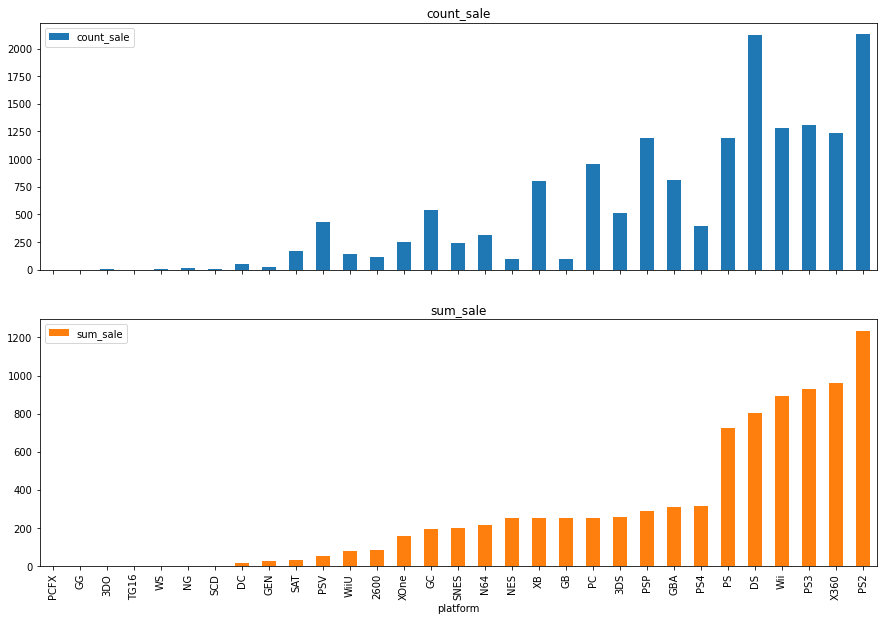

In [28]:
# построим графики по сводной таблице
data.groupby('platform').agg(count_sale=('name', 'count'), sum_sale=('sum_sales', 'sum')).\
sort_values(by='sum_sale').plot(kind='bar',subplots=True, figsize=(15,10));

* Построим распределения для трех платформ с самыми большими суммарными продажами - PS2, X360, PS3. И добавим график с платформой PS4, чтобы нагляднее увидеть среднее время до появления новых версий платформ

* Возьмем в дальнейшем для анализа 5 самых популярных платформ

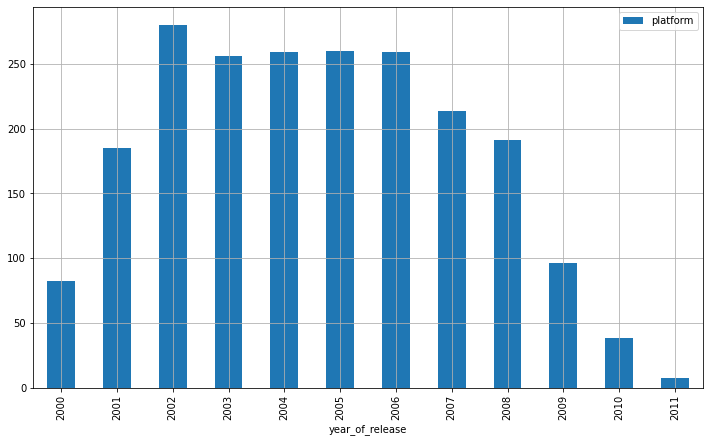

In [29]:
data.query('platform == "PS2"').\
pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(kind='bar', figsize=(12,7), grid=True);

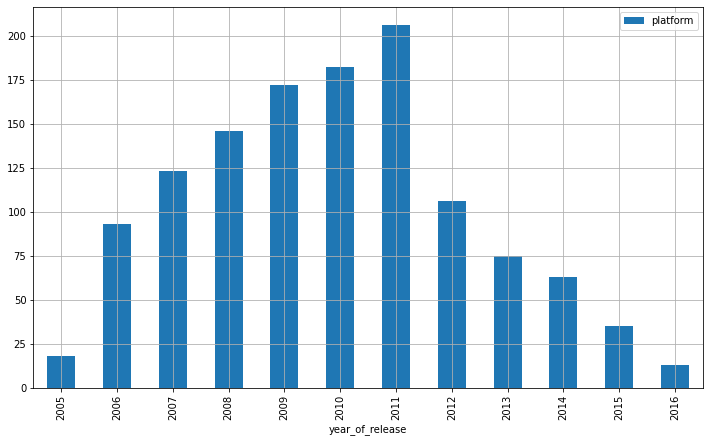

In [30]:
data.query('platform == "X360"').\
pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(kind='bar', figsize=(12,7), grid=True);

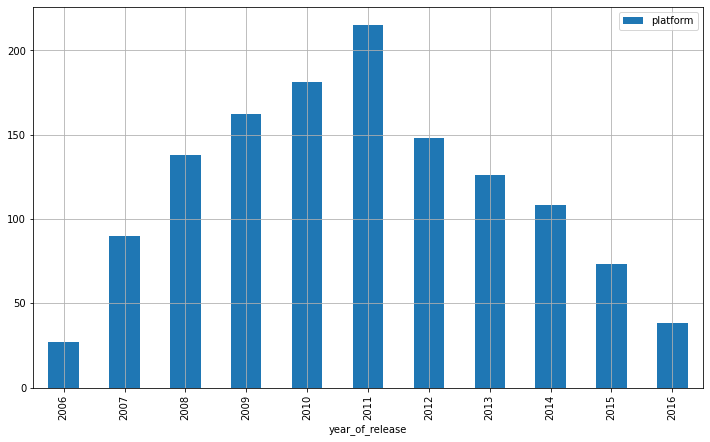

In [31]:
data.query('platform == "PS3"').\
pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(kind='bar', figsize=(12,7), grid=True);

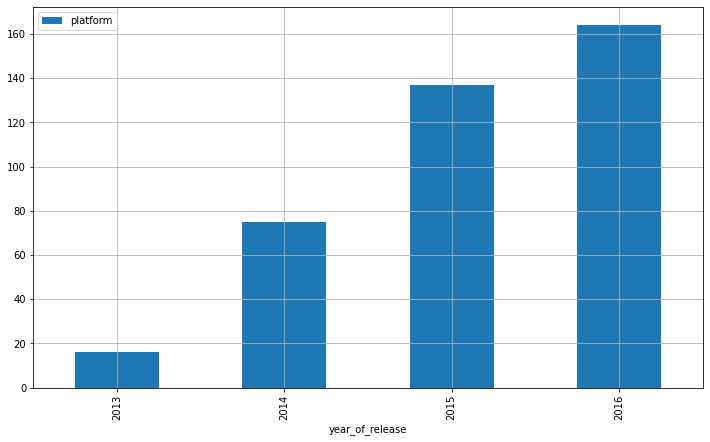

In [32]:
data.query('platform == "PS4"').\
pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(kind='bar', figsize=(12,7), grid=True);

* Мы видим, что в среднем до появления новых версий платформ проходит 5-6 лет. Через 5 лет происходит спад выпуска игр, и через 9-11 лет на платформу перестают выпускать новые игры. PS4 самая свежая и данные по ней есть только до 2016 года. 

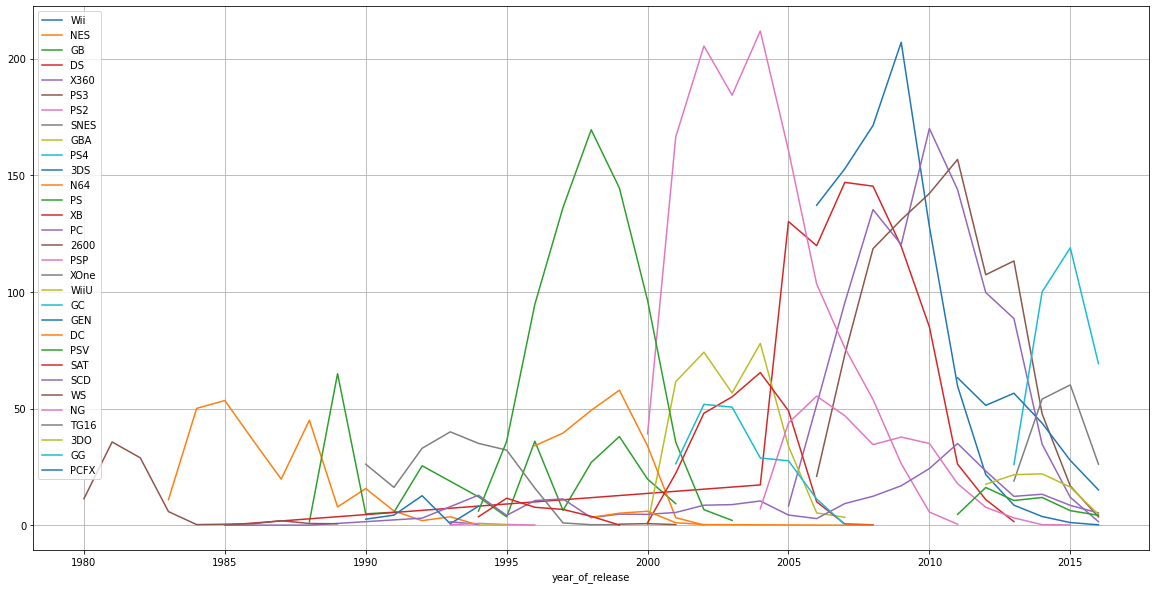

In [33]:
platforms = data['platform'].unique() # список со всеми платформами датасета
fig, ax = plt.subplots()
for plat in platforms:
    data[data['platform'] == plat].\
    pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(figsize=(20,10), grid=True, ax=ax)
ax.legend(platforms)
plt.show()


* Мы построили графика по суммарным продажам для всех платформ, получилось красочно, но информации слишком много, сложно выделить какие-то конкретные платформы. Попробуем отфильтровать данные, убрав года раньше 2008, к этому году многие платформы уже начали исчезать

In [34]:
data_sort = data.query('year_of_release >= 2008').copy()


* Теперь график уже нагляднее. Видно, что многие платформы исчезают к 2011-2013 году, а в 2013 также появились две новых. Полагаю, теперь за **актуальный период** мы можем взять данные начиная с 2013 года. К 2016 году все платформы демонстрируют снижение продаж. Но есть лидеры, их и возьмем за топ-5 самых популярных платформ - это PS4, Xbox One, 3DS Nintendo, Xbox 360 и PS3

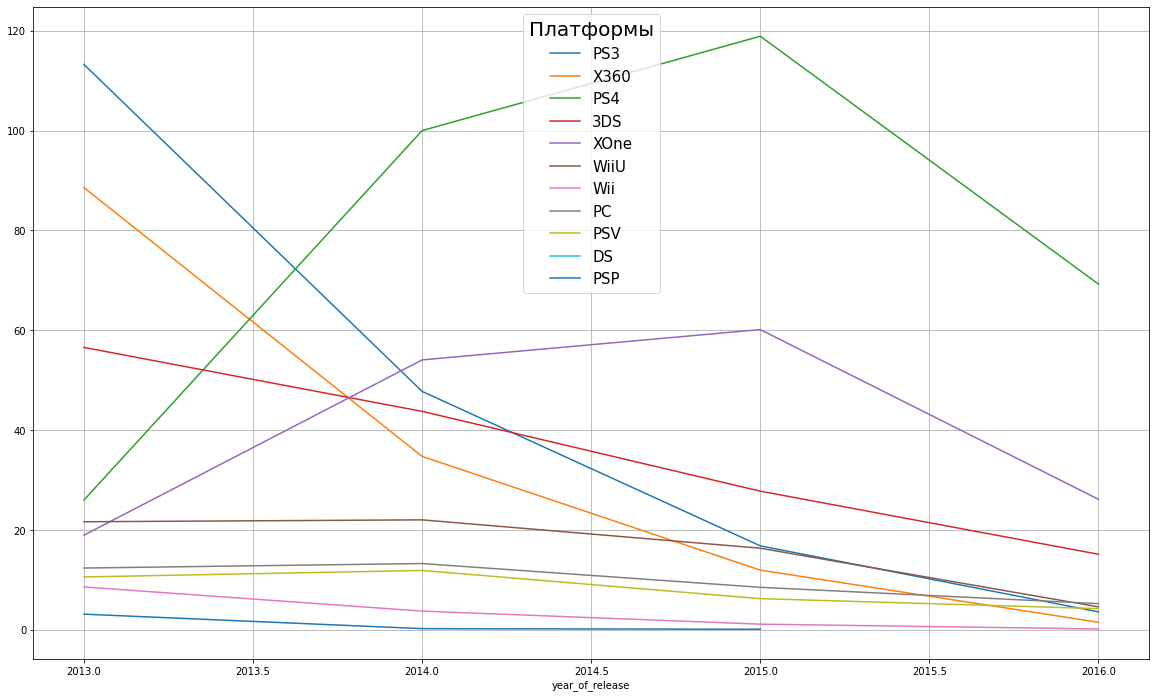

In [36]:
data_sort = data.query('year_of_release >= 2013').copy()
platforms = data_sort['platform'].unique()
fig, ax = plt.subplots()
for plat in platforms:
    data_sort[data_sort['platform'] == plat].\
    pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(figsize=(20,12), grid=True, ax=ax)
ax.legend(platforms, 
          fontsize=15, 
          title = 'Платформы', 
          title_fontsize = '20')
plt.show()

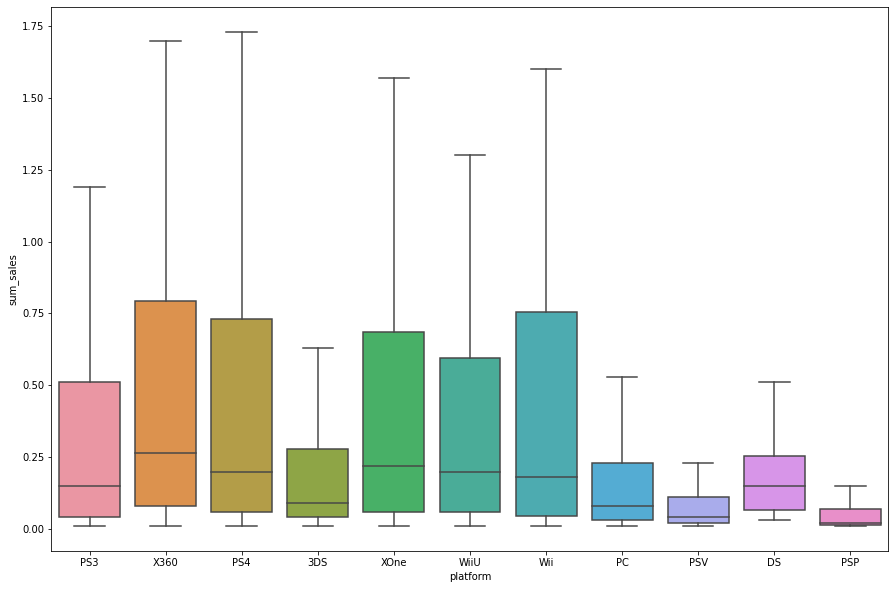

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='platform', y='sum_sales', data=data_sort, ax=ax, showfliers=False);


* Мы построили график ящика для примерно 14 платформ с активными продажами игр позже 2008 года. Выбросы есть у всех платформ, отбрасывать их думаю не совсем верно, вряд ли это ошибки или случайные данные. В основном количество проданных копий лежит в диапазоне от 100 тыс. до 1.75 млн. Самая большая медиана у платформ X360, PS3, PS4, у них же и самые больше выбросы. В целом график подтверждает выбор самых массовых платформ из предыдущего пункта - оставим  PS4, Xbox One, 3DS Nintendo, Xbox 360 и PS3. Высокие продажи и у Wii, но ее поддержка прекращена в 2013 году, поэтому не будем учитывать ее.

### Влияние отзывов на продажи по платформам

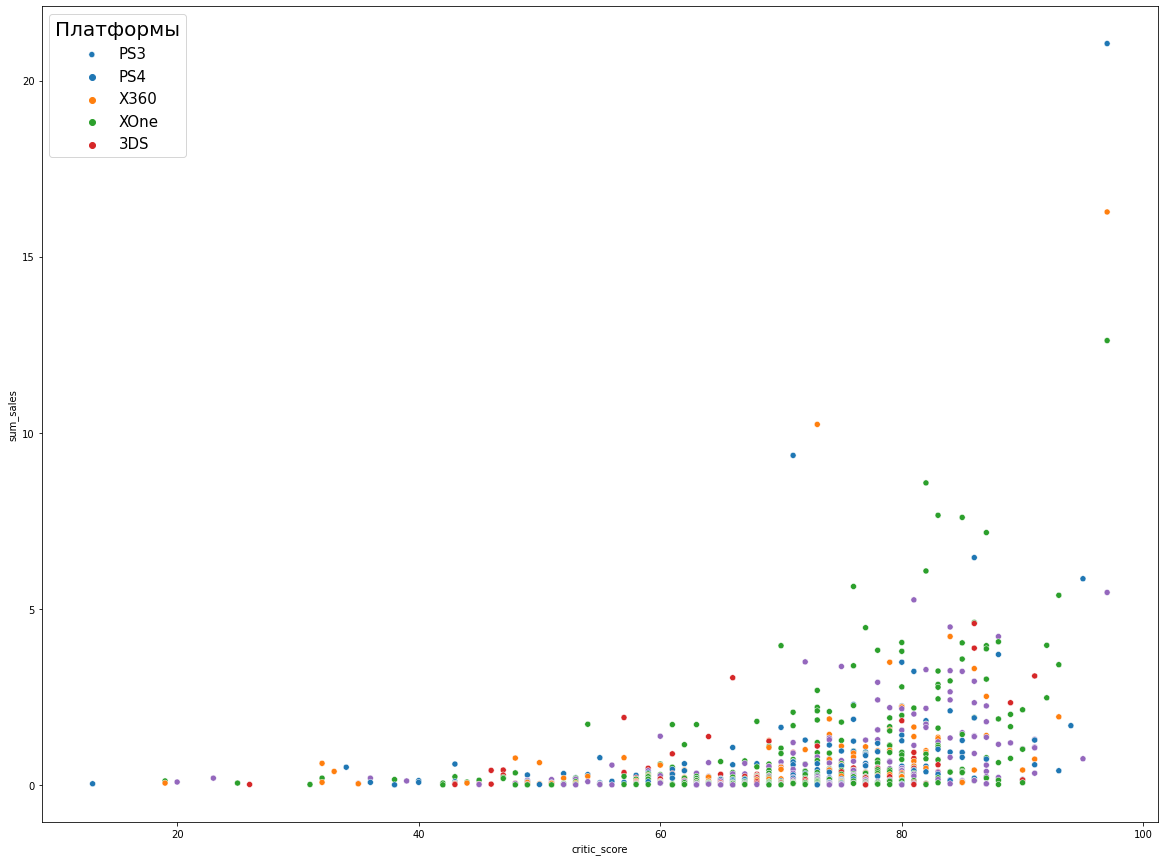

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
top_platf = ['PS3', 'PS4', 'X360', 'XOne', '3DS']
data_top_platf = data_sort.query('platform in @top_platf').copy()
sns.scatterplot(x='critic_score', y='sum_sales', hue='platform', data=data_top_platf, ax=ax);
ax.legend(top_platf, fontsize=15, 
          title = 'Платформы', 
          title_fontsize = '20')

In [39]:
data_top_platf['critic_score'].corr(data_top_platf['sum_sales'])

0.3603741896177766

In [40]:
for platf in top_platf:
    k = data_top_platf.query('platform == @platf')['critic_score'].corr(data_top_platf['sum_sales'])
    print(f'коэффициент корреляции для платформы {platf} равен {round(k, 3)}')


коэффициент корреляции для платформы PS3 равен 0.334
коэффициент корреляции для платформы PS4 равен 0.407
коэффициент корреляции для платформы X360 равен 0.35
коэффициент корреляции для платформы XOne равен 0.417
коэффициент корреляции для платформы 3DS равен 0.357


* График рассеяния показывает нам, что определенно есть зависимость между рейтингом от критиков и суммарными продажами, причем зависимость актуальна для всех популярных платформ. Зависимость скорее нелинейная, потому что большой всплеск продаж виден уже только на очень высоких рейтингах (на графике виден такой широкий рассеивающийся хвост ближе к рейтингу 100)
* Коэффициент корреляции также показывает наличие прямой связи между параметрами. Для всех популярных платформ он равен 0.36.
* Если рассматривать каждую платформу отдельно, то самая сильная связь наблюдается для XOne, а самая слабая для PS3

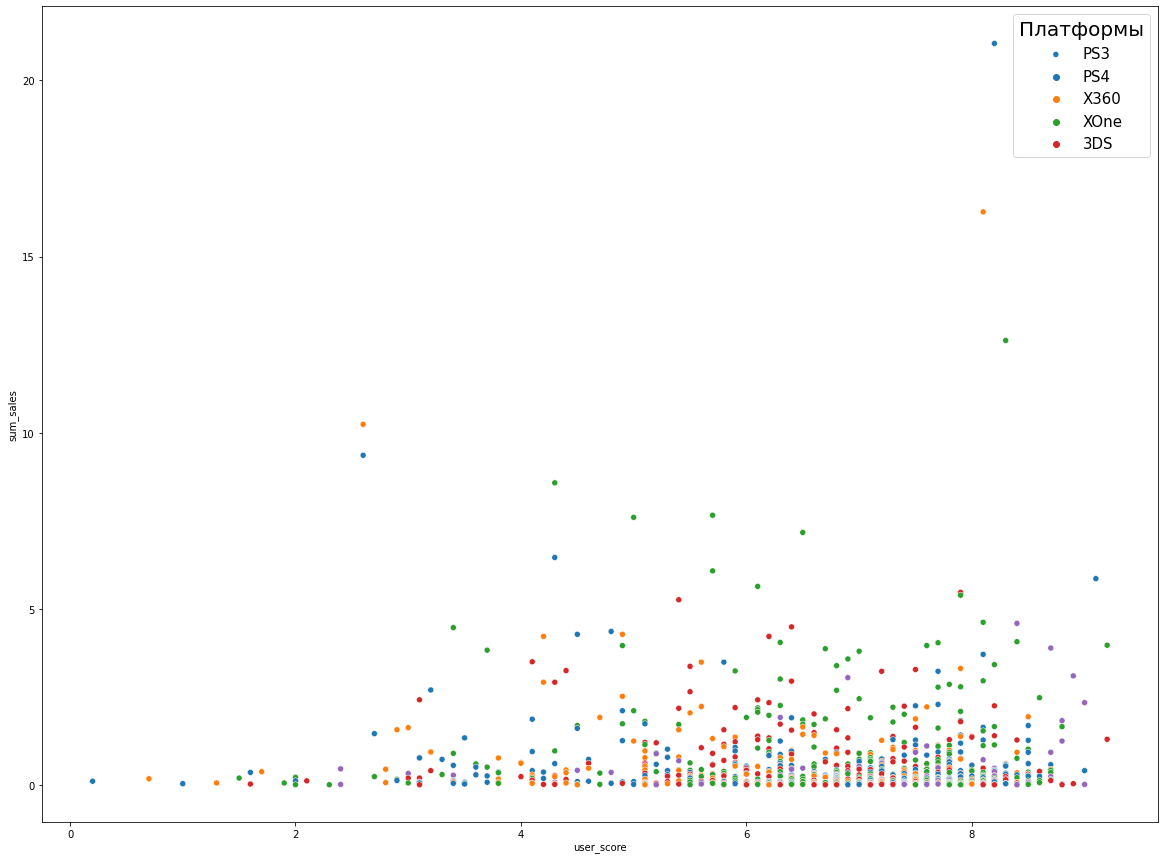

In [41]:
fig, ax = plt.subplots(figsize=(20,15))
top_platf = ['PS3', 'PS4', 'X360', 'XOne', '3DS']
data_top_platf = data_sort.query('(platform in @top_platf) & (user_score != 111)').copy()
sns.scatterplot(x='user_score', y='sum_sales', hue='platform', data=data_top_platf, ax=ax);
ax.legend(top_platf, fontsize=15, 
          title = 'Платформы', 
          title_fontsize = '20')

In [42]:
data_top_platf[data_top_platf['user_score'] != 111]['user_score'].\
corr(data_top_platf[data_top_platf['user_score'] != 111]['sum_sales'])

-0.008173112758975733

* Любопытно, что зависимость от пользовательских оценок намного слабее, чем от экспертных. Судя по всему, люди больше доверяют оценке критиков

### Распределение игр по жанрам

In [43]:
data_sort.pivot_table(index='genre', values=['name', 'sum_sales'], aggfunc={'sum_sales':'sum', 'name':'count'}).\
sort_values(by='sum_sales')

,name,sum_sales
genre,,
Puzzle,17,3.17
Strategy,56,10.08
Simulation,62,21.76
Adventure,245,23.64
Fighting,80,35.31
Racing,85,39.89
Platform,74,42.63
Misc,155,62.82
Role-Playing,292,145.89


In [44]:
data_sort.pivot_table(index='genre', values=['sum_sales'], aggfunc='median').\
sort_values(by='sum_sales')

,sum_sales
genre,
Adventure,0.030
Puzzle,0.060
Strategy,0.080
Misc,0.100
Simulation,0.100
Action,0.110
Racing,0.120
Fighting,0.125
Role-Playing,0.125


* Можно увидеть, что самый популярный жанр по количеству проданных игр - экшн. Меньше всего продаж у паззлов. При этом самые прибыльные жанры - шутеры, спорт и платформеры.

## Портрет пользователя каждого региона

### Самые популярные платформы

In [45]:
data_na_sales = data_sort.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values(by='na_sales').copy()
data_na_sales = data_na_sales.reset_index()
data_na_sales.loc[data_na_sales['na_sales'] < 30, 'platform'] = 'others'
data_na_sales = data_na_sales.groupby('platform')['na_sales'].sum().reset_index()

In [46]:
data_eu_sales = data_sort.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales').copy()
data_eu_sales = data_eu_sales.reset_index()
data_eu_sales.loc[data_eu_sales['eu_sales'] < 30, 'platform'] = 'others'
data_eu_sales = data_eu_sales.groupby('platform')['eu_sales'].sum().reset_index()

In [47]:
data_jp_sales = data_sort.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales').copy()
data_jp_sales = data_jp_sales.reset_index()
data_jp_sales.loc[data_jp_sales['jp_sales'] < 10, 'platform'] = 'others'
data_jp_sales = data_jp_sales.groupby('platform')['jp_sales'].sum().reset_index()

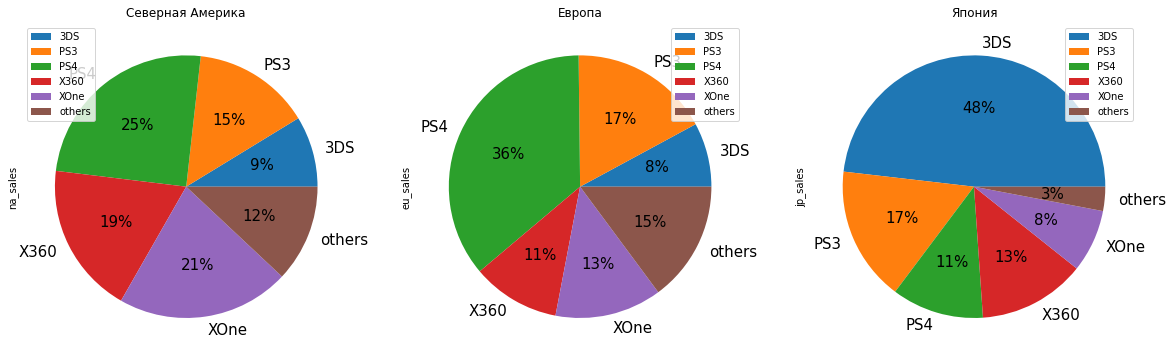

In [48]:
fig = plt.figure(figsize=(20,15))

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)


data_na_sales['na_sales'].\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_1, labels=data_na_sales['platform']);

data_eu_sales['eu_sales'].\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_2, labels=data_eu_sales['platform']);

data_jp_sales['jp_sales'].\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_3, labels=data_eu_sales['platform']);


ax_1.set(title='Северная Америка')
ax_2.set(title='Европа')
ax_3.set(title='Япония')
ax_1.legend()
ax_2.legend()
ax_3.legend()

* Видим, что в Европе и Америке самые популярные платформы это PS3, PS4 и X360. А вот в Японии совсем другое распределение - в лидерах с большим отрывом 3DS. 

### Самые популярные жанры

In [49]:
data_na_genre = data_sort.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values(by='na_sales').copy()
data_na_genre = data_na_genre.reset_index()
data_na_genre.loc[data_na_genre['na_sales'] < 20, 'genre'] = 'others'
data_na_genre = data_na_genre.groupby('genre')['na_sales'].sum().reset_index()

In [50]:
data_eu_genre = data_sort.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales').copy()
data_eu_genre = data_eu_genre.reset_index()
data_eu_genre.loc[data_eu_genre['eu_sales'] < 20.1, 'genre'] = 'others'
data_eu_genre = data_eu_genre.groupby('genre')['eu_sales'].sum().reset_index()


In [51]:
data_jp_genre = data_sort.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales').copy()
data_jp_genre = data_jp_genre.reset_index()
data_jp_genre.loc[data_jp_genre['jp_sales'] < 6, 'genre'] = 'others'
data_jp_genre = data_jp_genre.groupby('genre')['jp_sales'].sum().reset_index()

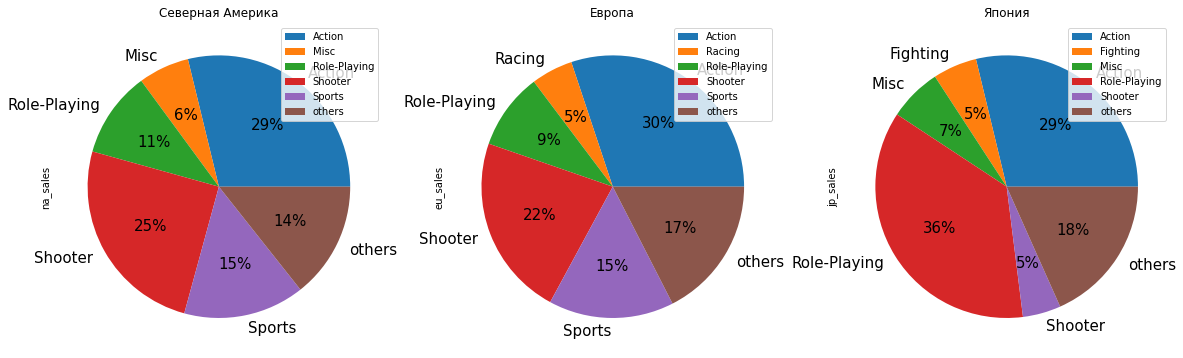

In [52]:
fig = plt.figure(figsize=(20,15))

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

data_na_genre['na_sales'].\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_1, labels=data_na_genre['genre']);

data_eu_genre['eu_sales'].\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_2, labels=data_eu_genre['genre']);

data_jp_genre['jp_sales'].\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_3, labels=data_jp_genre['genre']);

ax_1.set(title='Северная Америка')
ax_2.set(title='Европа')
ax_3.set(title='Япония')

ax_1.legend()
ax_2.legend()
ax_3.legend()

* Аудитория Северной Америки и Европы почти не отличается по жанровым предпочтениям - в тройке лидеров экшн, шутеры и спорт. Также на 4 месте ролевые игры, а вот пятое отличается - в Америке ролевые игры, в Европе - гонки. Япония очень выделяется в плане жанровых предпочтений, пятерка лидеров - ролевые игры, экшн, шутеры, разный жанр и файтинг.

### Влияние рейтинга ESRB на продажи

In [53]:
# заполним пропуски в столбце с возрастным рейтингом значением no_rating, чтобы более детально 
# проанализировать различие по регионам
data_sort['rating'] = data_sort['rating'].fillna('no_rating')

[Text(0.5, 1.0, 'Япония')]

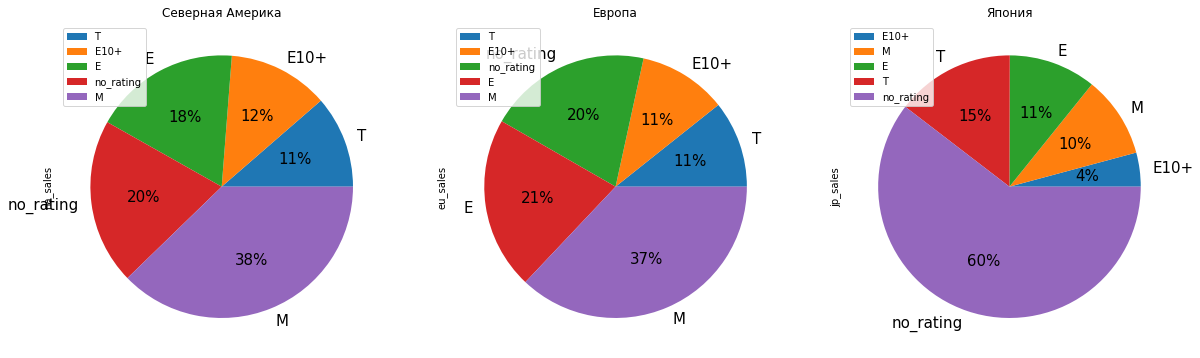

In [54]:
fig = plt.figure(figsize=(20,15))

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

data_sort.pivot_table(index='rating', values='na_sales',aggfunc='sum').sort_values(by='na_sales').\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_1);

data_sort.pivot_table(index='rating', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales').\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_2);

data_sort.pivot_table(index='rating', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales').\
plot(kind='pie', subplots=True, autopct='%1.0f%%', fontsize=15, ax=ax_3);

ax_1.set(title='Северная Америка')
ax_2.set(title='Европа')
ax_3.set(title='Япония')

* В Европе и Америке различия почти незаметны - первое место с отрывом у игр для взрослых, потом с небольшой разницей идут игры с рейтингом Е - для всех возрастов. ТАкже велика доля игр без рейтинга вообще - предположу, что издатель игр не обращался к ESRB для присвоения игре рейтинга или имели место быть случайные пропуски в данных. А вот в Японии на игры без рейтинга приходится самая большая доля - думаю, это также возможно из-за того, что в Японии могут быть популярны игры местных разработчиков, тоже не обращающихся к ESRB. В Японии есть также своя аналогичная организация, она ставит рейтинги играм, продающимся на территории Японии (CERO). А второе место за играми для подростков и старше.

## Проверка гипотез

### Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средние пользовательские рейтинги (user_score) платформы Xbox One = Средние пользовательские рейтинги платформы PC`
H_a:  Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC`
alpha = 0.05
```

In [55]:
data_xone = data_sort.query('(platform == "XOne") & (user_score != 111)')['user_score']

In [56]:
data_pc = data_sort.query('(platform == "PC") & (user_score != 111)')['user_score']

In [57]:
results = st.ttest_ind(data_xone, data_pc, equal_var=False)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

```
H_0: Средние пользовательские рейтинги жанра Action = Средние пользовательские рейтинги жанра Sports`
H_a:  Средние пользовательские рейтинги жанра Action ≠  Средние пользовательские рейтинги жанра Sports`
alpha = 0.05
```

In [58]:
data_action = data_sort.query('(genre == "Action") & (user_score != 111)')['user_score']

In [59]:
data_sports = data_sort.query('(genre == "Sports") & (user_score != 111)')['user_score']

In [60]:
results = st.ttest_ind(data_action, data_sports, equal_var=False)

alpha = 0.05 
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


* Так как нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, то таким образом и наши нулевые гипотезы формируются. В первой гипотезе мы выясняли, равны ли рейтинги для двух разных платформ, соответственно, нулевая гипотеза будет звучат, как "да, эти рейтинги для двух платформ равны". Альтернативная гипотеза принимается верной, если отбрасывается нулевая. Соответственно, если мы отвергаем, что рейтинги равны, то альтернативная гипотеза будет утверждать, что рейтинги не равны друг другу.
* Метод используем st.ttest_ind - для независимых выборок при сравнении их статистик друг с другом

## Выводы

* После проведенного анализа мы выявили следующее:
1. Самые популярные платформы - PS4, PS3, Xbox One, Xbox 360, на японском рынке самая популярная платформа - 3DS Нинтендо
2. Самые популярные игровые жанры на западном рынке - экшн и шутеры, но в Японии лидер - ролевые игры (RPG).
3. Самые прибыльные жанры - шутеры и спорт.
4. К 2016 году в целом замечено снижение продаж на всех платформах
5. На продажи влияют рейтинги критиков и пользователей, чем выше рейтинг, тем в среднем больше продаж у игры. Но рейтинг критиков влияет на продажи намного сильнее, чем пользовательский.
6. Самые большие продажи у игр с рейтингом Е - эти игры подходят и для детей и для взрослых, поэтому во всех регионах они занимают значительную долю рынка. При этом игры для взрослых также занимают значительную долю продаж

Таким образом, формула популярной игры - это жанр экшн или шутер, на платформе PlayStation с возрастным рейтингом Е или М. Но следует учитывать, что японский рынок игр несколько другой - популярная игра это жанр RPG на Нинтендо с рейтингом Т.